In [1]:
import cv2
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

In [2]:
def check(point, shape):
    print(point, shape)
    y, x = point
    if y >= shape[0] or x >= shape[1]:
        return False
    if y < 0 or x < 0:
        return False
    return True

In [3]:
def update_corners(top_left, bottom_right, shape, inc):
    y1, x1 = top_left
    y2, x2 = bottom_right
    print(shape)
    h = shape[0]
    w = shape[1]
    if y1 < 0:
        y1 = 0
        y2 = 2 * inc
    elif y2 >= h:
        y2 = h
        y1 = h - (2 * inc)
    if x1 < 0:
        x1 = 0
        x2 = 2 * inc
    elif x2 >= w:
        x2 = w
        x1 = w - (2 * inc)
    return ((y1, x1), (y2, x2))

In [4]:
def crop(event, x, y, flags, param):
    inc = 75
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, y)
        while inc <= 150:
            top_left = y - inc, x - inc
            bottom_right = y + inc, x + inc
            top_left, bottom_right = update_corners(top_left, bottom_right, img.shape, inc)
            print(top_left, bottom_right)
            crop_img = img[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1]]
            print(crop_img.shape)
            cv2.imwrite('save1.jpg', crop_img)
            img1 = pyplot.imread('save1.jpg')
            img2 = pyplot.imread('5.jpeg')
            detector = MTCNN()
            faces = detector.detect_faces(img1)
            print(faces)
            if len(faces) > 0:
                pyplot.imshow(img2)
                ax = pyplot.gca()
                for face in faces:
                    x, y, width, height = face['box']
                    x = top_left[1] + x
                    y = top_left[0] + y
                    rect = Rectangle((x, y), width, height, fill=False, color='red')
                    ax.add_patch(rect)
                    pyplot.show()
                    # draw_image_with_boxes(img1, faces)
                break
            else:
                inc = inc + 25

315 265
(338, 468, 3)
(188, 240) (338, 390)
(150, 150, 3)
[{'box': [24, 26, 80, 97], 'confidence': 0.9993334412574768, 'keypoints': {'left_eye': (52, 74), 'right_eye': (84, 58), 'nose': (80, 85), 'mouth_left': (66, 104), 'mouth_right': (97, 89)}}]


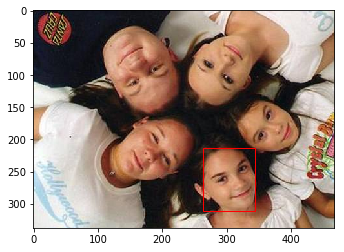

In [6]:
cv2.namedWindow("image")
img = cv2.imread("5.jpeg")
cv2.setMouseCallback("image", crop)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()